In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import matplotlib.pyplot as plt

In [13]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
print(len(train_data), len(test_data))
print(train_data[0])
print(train_labels[0])

8982 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [16]:
# 데이터를 벡터로 변환
def vectorize_sequences(seqs, dim = 10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
# 레이블을 벡터로 변환
def to_one_hot(labels, dim = 46):
    results = np.zeros((len(labels), dim))
    for i, k in enumerate(labels):
        results[i, k] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [21]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
# 마지막 Dense층의 크기가 46 -> 46차원의 벡터를 출력(각 원소는 각기다른 출력 클래스가 인코딩된 것)
# 각 입력샘플마다 46개의 출력클래스에 대한 확률분포를 출력하기 위해 softmax 활성화 함수 사용
# 46차원의 출력벡터를 만들며, output[i]는 어떤 샘플이 클래스 i에 속할 확률 / 46개를 모두 더하면 1이됨

In [28]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.6096 - accuracy: 0.4742 - val_loss: 1.7462 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.4132 - accuracy: 0.7073 - val_loss: 1.3216 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0418 - accuracy: 0.7831 - val_loss: 1.1433 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8207 - accuracy: 0.8302 - val_loss: 1.0590 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6538 - accuracy: 0.8649 - val_loss: 0.9909 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5281 - accuracy: 0.8920 - val_loss: 0.9297 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4192 - accuracy: 0.9122 - val_loss: 0.9104 - val_accuracy: 0.8170
Epoch 8/20
16

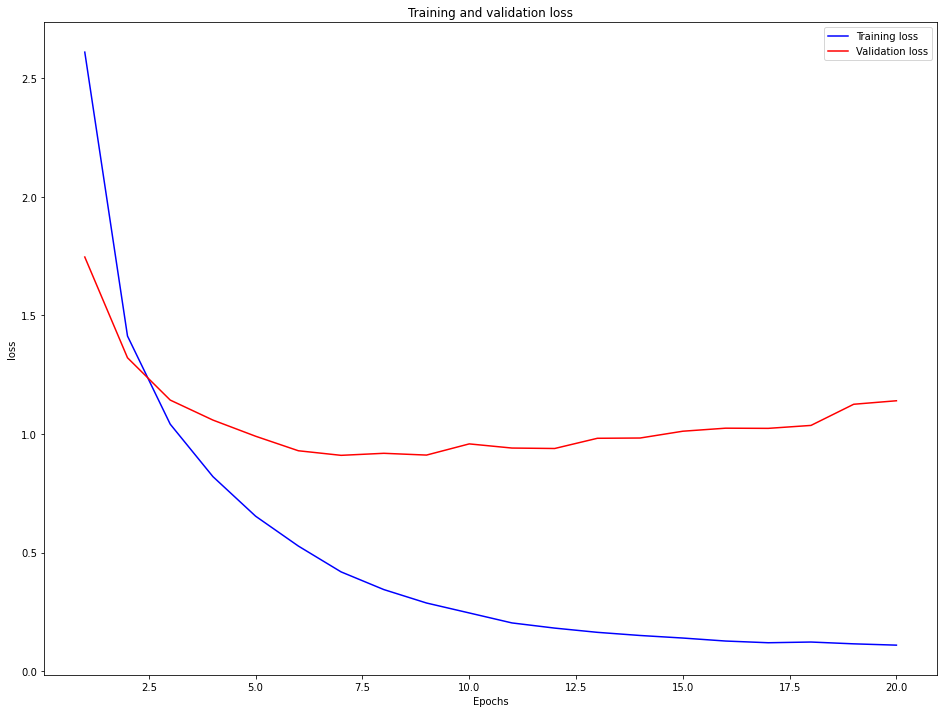

In [32]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize = (16, 12))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

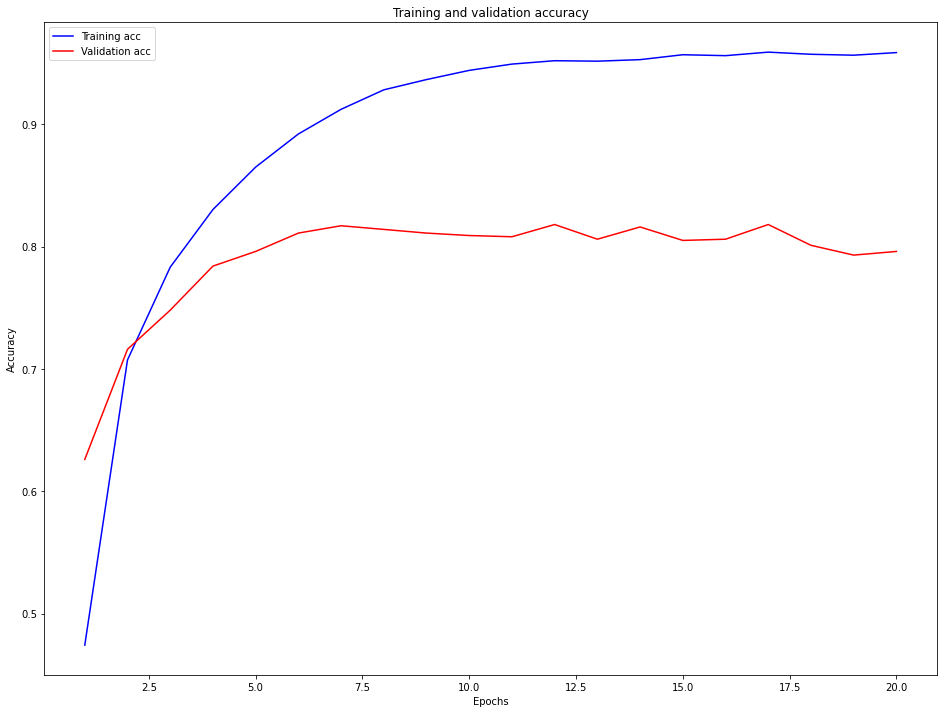

In [37]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize = (16, 12))
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# 9번째 epochs에서 과대적합 시작
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 2.6442 - accuracy: 0.4887 - val_loss: 1.7896 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 0s 29ms/step - loss: 1.4566 - accuracy: 0.7058 - val_loss: 1.3435 - val_accuracy: 0.6940
Epoch 3/9
16/16 [==============================] - 0s 31ms/step - loss: 1.0722 - accuracy: 0.7699 - val_loss: 1.1304 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 0s 31ms/step - loss: 0.8381 - accuracy: 0.8182 - val_loss: 1.0307 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 0s 30ms/step - loss: 0.6667 - accuracy: 0.8544 - val_loss: 0.9487 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 0s 30ms/step - loss: 0.5348 - accuracy: 0.8903 - val_loss: 0.8968 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 1s 32ms/step - loss: 0.4275 - accuracy: 0.9119 - val_loss: 0.8789 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [47]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [48]:
np.sum(predictions[0])
# float을 컴퓨터가 처리하는 방식으로 인해 발생한 오차가 약간 있을 수 있음   

0.99999994

In [49]:
np.argmax(predictions[0])

3